# Neural and Data Analytics Lab Tutorials

## How Frequency Representations Go Wrong

##### Sydney Smith 2018

The information provided in this tutorial is based on the Cole & Voytek 2017 paper *Brain Oscillations and the Importance of Waveform Shape*. Read it here: https://www.cell.com/trends/cognitive-sciences/fulltext/S1364-6613(16)30218-2.

Many of the techniques used to analyze neural signals, such as the Fourier Transform, filtering, etc., assume that the signals are sinusoidal in nature. These methods are found broadly in the literature and have been used to characterize aspects of the signal like oscillations, bursts, and frequency interactions. This presents a problem. Why? Because neural signals are rarely, if ever, sinusoidal. 

In this this tutorial, we will:

1. differentiate between sinuoids and non-sinusoids

2. demonstrate non-sinusoidal waveforms in the frequency domain

3. identify the non-sinusoidal features of neural oscillatons

4. suggest alternative analysis methods and where to find them



### Default imports

In [11]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import matplotlib

figure = {'figsize': (12,4)}
matplotlib.rc('figure', **figure)

## 1. Sinusoids vs Non-sinusoids

### Simple Sinusoids

Methods in neural signal analysis are based on the assumptions that the signal in question is sinusoidal. A sinusoid is a smooth, periodic oscillation. Let's generate one now.

Text(0.5,1,'Sinusoidal Signal')

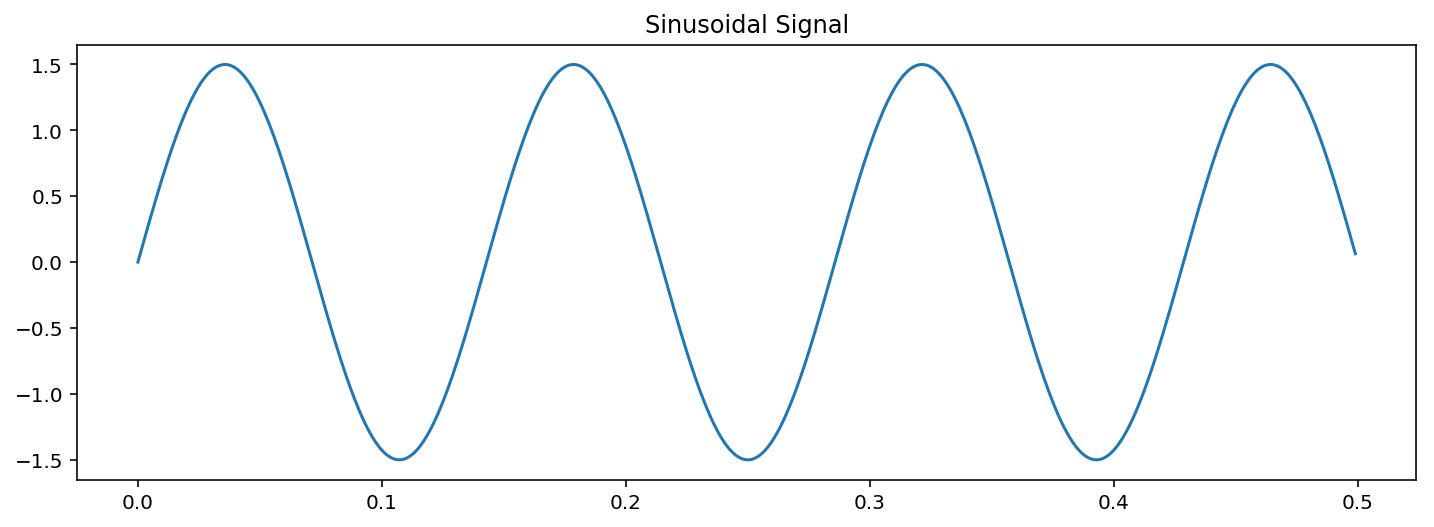

In [12]:
f = 1024 #sampling frequency
dur = 10 #10 seconds of signal
freq = 7 #7 Hz signal
freq2 = 130 #130 Hz signal
t = np.arange(0, dur, 1/f) #times for d
sig1 = np.sin(2 * np.pi * freq * t) #10 Hz wavelength
sig1 = 1.5*sig1; #increase the power of signal 1
#sig2 = np.sin(2 *np.pi * freq2 * t) #130 Hz wavelength
#complex_signal = sig1+sig2;
plt.plot(t[0:512],sig1[0:512]) #plot 0.5 seconds of data
plt.title('Sinusoidal Signal')

### Complex Sinusoids

Adding more than one sinusoid together creates a complex sinusoid.

Text(0.5,1,'Complex Sinusoid')

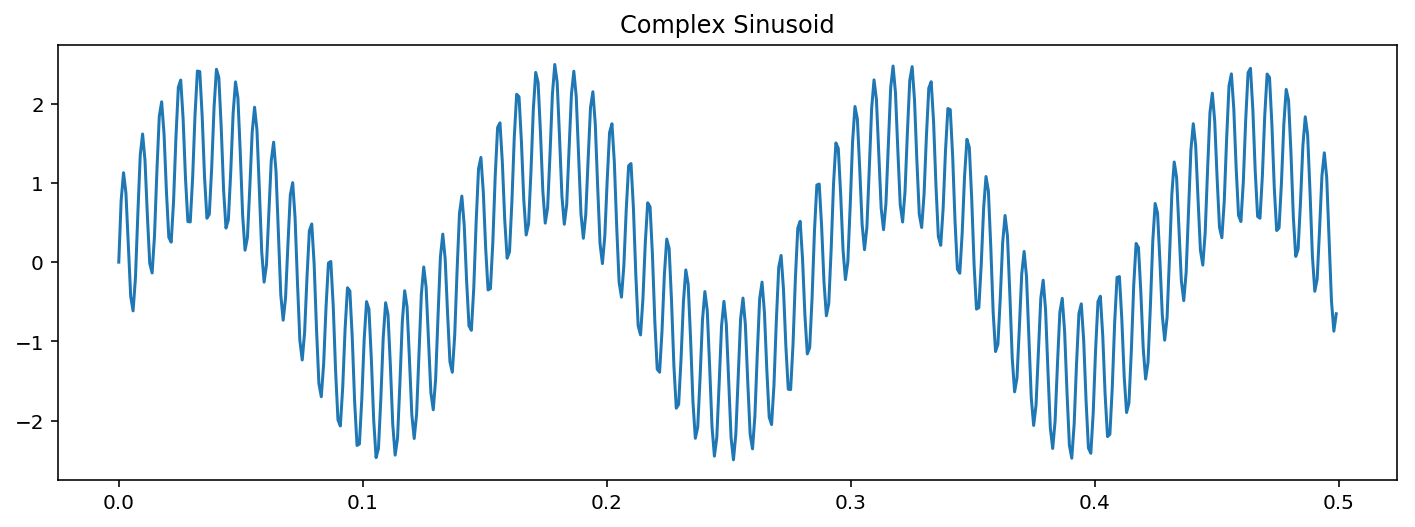

In [13]:
sig2 = np.sin(2*np.pi*freq2*t)
complex_signal = sig1+sig2;
plt.plot(t[0:512], complex_signal[0:512])
plt.title('Complex Sinusoid')

Adding enough sinusoids together creates a complex signal that starts to resemble something we might see in a real electrophysiological recording. The following complex signal is composed of four frequencies: 7 Hz, 18 Hz, 80 Hz, and 130 Hz. 

Text(0.5,1,'4-Frequency Complex Sinusoid')

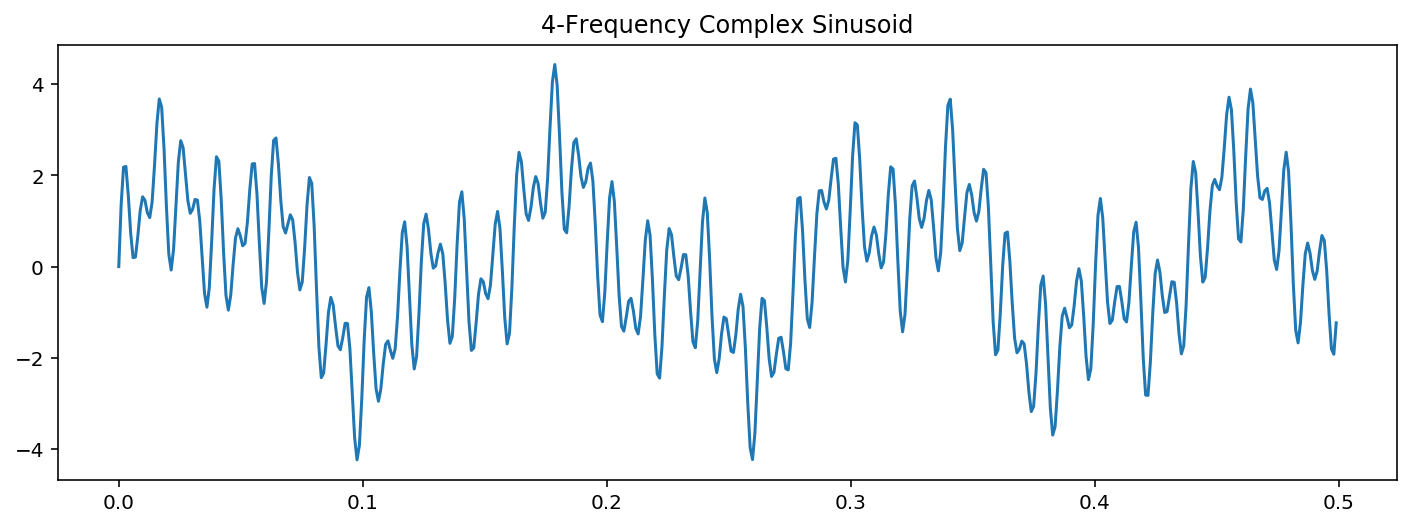

In [14]:
freq3 = 18 #18 Hz signal
freq4 = 80
sig3 = np.sin(2*np.pi*freq3*t)
sig4 = np.sin(2*np.pi*freq4*t)
complex_signal2 = signal = sig1+sig2+sig3+sig4
plt.plot(t[0:512], complex_signal2[0:512], label = 'complex signal')
plt.title('4-Frequency Complex Sinusoid')

### Non-sinusoids

Now lets see what a non-sinusoidal signal looks like.

Text(0.5,1,'Sawtooth Signal')

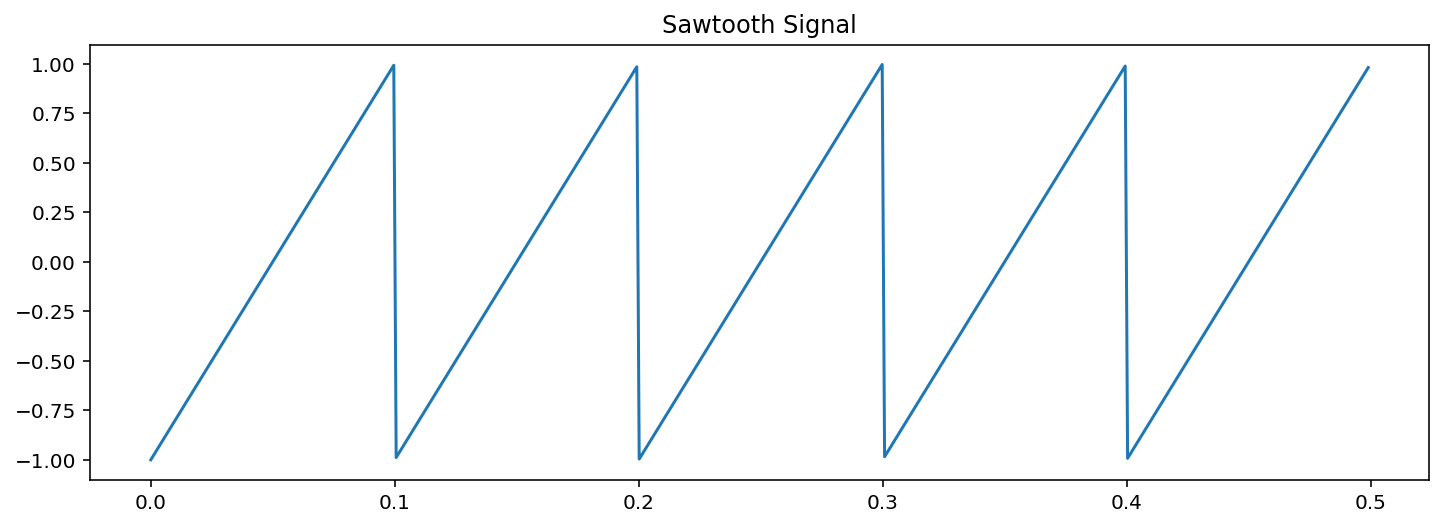

In [15]:
from scipy import signal

freq = 10 #10 Hz signal
saw_signal = signal.sawtooth(2*np.pi*freq*t)
plt.plot(t[0:512], saw_signal[0:512], label='sawtooth signal')
plt.title('Sawtooth Signal')

Notice this waveform is not a smooth oscillation like the sinusoids above. Instead, its shape resembles the serrated edge of a saw. The "sawtooth" wave is an example of a nonsinudoidal waveform. Here are a few more non-sinusoids. 

Text(0.5,1,'Triangle Wave')

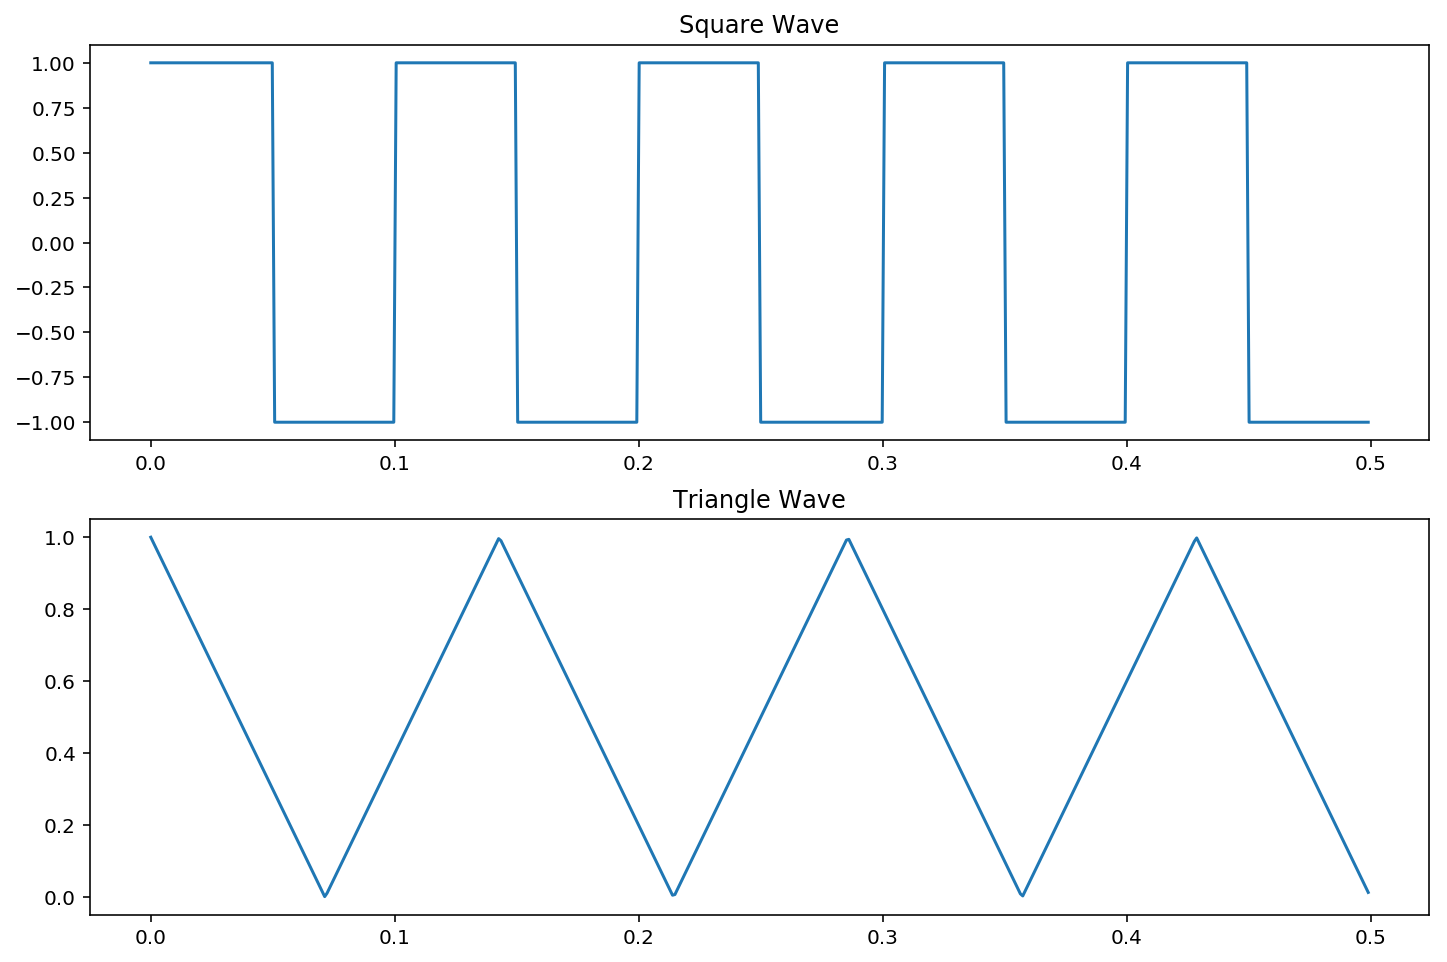

In [8]:
plt.figure(figsize = [12,8])

freq = 20 #20Hz 
square_signal = signal.square(np.pi*freq*t)
plt.subplot(2,1,1)
plt.plot(t[0:512], square_signal[0:512], label = 'square signal')
plt.title('Square Wave')

triangle_signal = np.abs(signal.sawtooth(2*np.pi*7*t))
plt.subplot(2,1,2)
plt.plot(t[0:512], triangle_signal[0:512])
plt.title('Triangle Wave')

## 2. Non-sinusoids in the Frequency Domain

Now lets see how sinusoids and non-sinusoids compare in the frequency domain. Let's start with the sawtooth wave. Here's the frequency spectrum, the first is the Fourier-transformed signal and the second is plotted using Welch's method. 

If you need a refresher on the frequency domain and PSD, check out our [tutorial](LINK!).

/Users/sydneysmith/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


Text(0.5,1,"Welch's PSD of sawtooth signal")

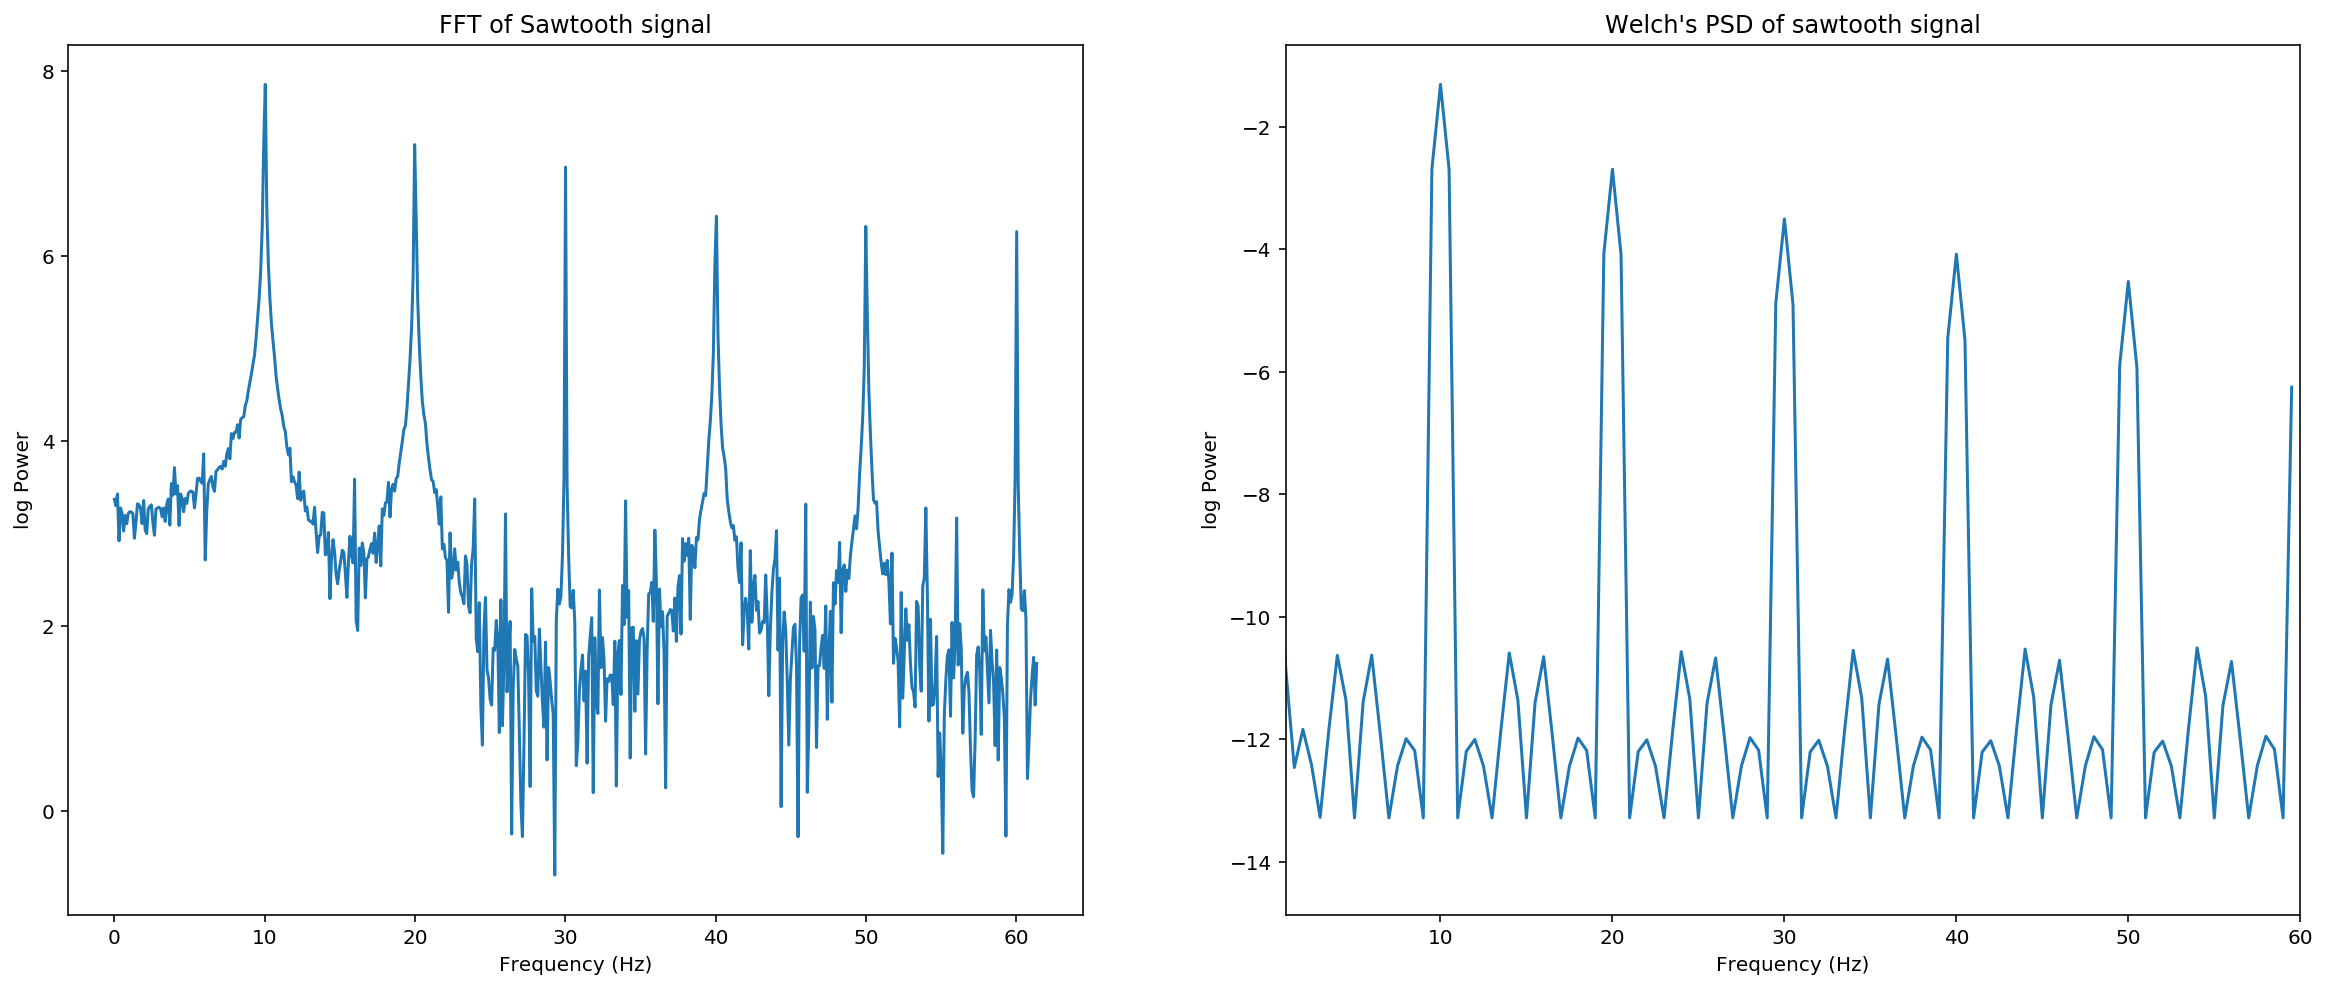

In [25]:
# Generate sawtooth signal at 10Hz
freq = 10 
saw_signal = signal.sawtooth(2*np.pi*freq*t)

# Fourier Transform on the sawtooth
fourier = np.fft.fft(saw_signal[0:10000])
fx_step_size = 1024/len(saw_signal[0:10000])
nyq = .5*1024
total_steps = nyq/fx_step_size
fx_bins = np.linspace(0,nyq,total_steps)

plt.figure(figsize=[20,8])

# Plot FFT
plt.subplot(1,2,1)
plt.plot(fx_bins[0:600],np.log(abs(fourier[0:600]))) 
plt.ylabel('log Power')
plt.xlabel('Frequency (Hz)')
plt.title('FFT of Sawtooth signal')

# Welch's PSD on sawtooth
welch_freq,pspec = sp.signal.welch(saw_signal, fs=1024, window='hanning', nperseg=2*1024, 
                          noverlap=1024/2, nfft=None, detrend='linear', return_onesided=True, scaling='density')
# Plot Welch's
plt.subplot(1,2,2)
plt.plot(welch_freq[0:60*2],np.log(abs(pspec[0:60*2])))
plt.ylabel('log Power')
plt.xlabel('Frequency (Hz)')
plt.xlim([1, 60])
plt.title("Welch's PSD of sawtooth signal")

Wait a minute... Those look weird, right? The sawtooth signal we generated has a frequency of 10Hz. So why are we seeing prominent peaks at 10, 20, 30, 40, 50, 60Hz? Notice that these peaks are appearing at integer multiples of the fundamental 10Hz. These are called harmonics. So why is the spectrum telling us there is power in these harmonics when we know that the only frequency present is 10Hz? 

Take a guess.

YES! It's because the sawtooth signal is non-sinusoidal. The Fourier Transform is specifically meant for sinusoidal waveforms, so **when it's used on a signal that is not sinusoidal, the math is still treating it like it's a complex sinusoid instead of a non-sinusoidal signal**. Therefore, we are given the frequencies of the sinusoidal psuedo-components that would create this non-sinusoidal signal. 

This creates a problem: the spectrum isn't representing the reality of the signal. But don't blame the math! It's doing exactly what we ask it too. We're just choosing the wrong method to look at it so *of course* we're getting the wrong answer. 

So what happens when we use this same math to analyze neural recordings? Neural recordings that are rarely, if ever, sinusoids? What happens when this math is used universally in the field, creating a standard of analysis in the literature, a standard that is used as a precedent for future experiments? 

...what have we gotten ourselves into?

***NOTE: Sorry I'm being a drama queen. This stuff is bordering on a science conspiracy and I'm having fun talking about it.***

## 3. Non-sinusoidal Features of Neural Oscillations

Now let's take a closer look at neural oscillations. What do the waveforms actually look like? We'll start by loading and plotting some local field potential (LFP) data recorded from a rat hippocampus.

### Load and plot data

Text(0.5,1,'Rat Hippocampal LFP')

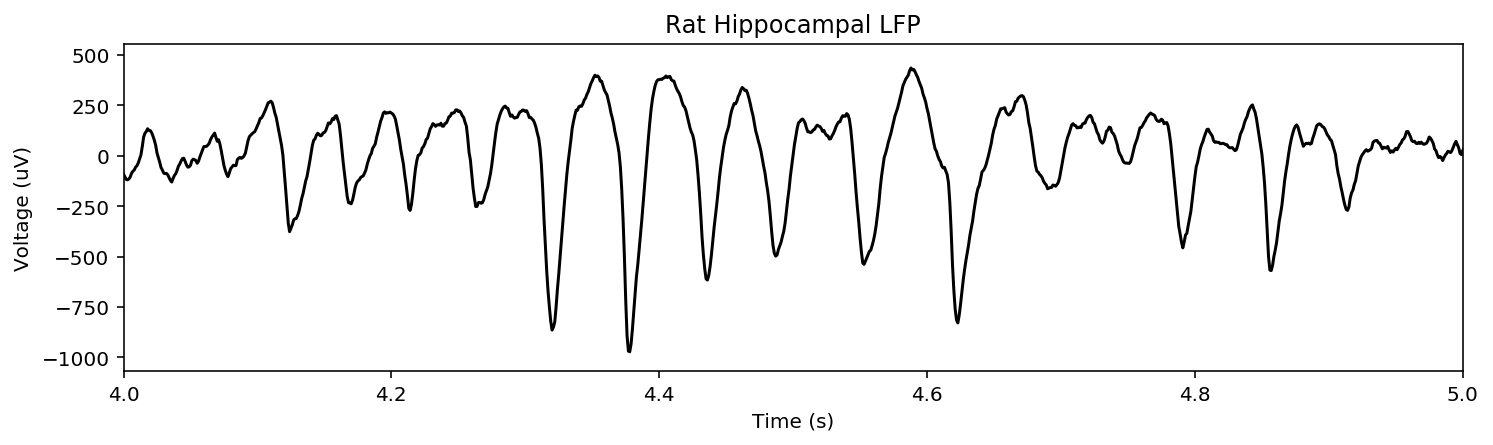

In [29]:
# Load signal
x = np.load('./data/sample_data_1.npy')
Fs = 1000
t = np.arange(0, len(x)/Fs, 1/Fs)
f_range = (13,30)

# Plot example signal
plt.figure(figsize=(12,3))
plt.plot(t, x, 'k')
plt.xlim((4,5))
plt.xlabel('Time (s)')
plt.ylabel('Voltage (uV)')
plt.title('Rat Hippocampal LFP')

Take a closer look at the time series we just plotted. **Notice how the peaks and the troughs of the waveforms aren't symmetrical for each cycle**. It looks like the peaks of the waveform are much wider and smoother than the sharp, narrow troughs. The waves around 4.4s are a great example of this. 

Sinusoids are smooth, symmetrical oscillations. These waveforms aren't smooth or symmetrical. Therefore, this is probably not a sinusoid. 

If neural signals aren't sinusoidal, the sinusoid-dependent analysis methods like the Fourier transform could potentially give false results, just like it did on the non-sinusoidal sawtooth wave. And if the math gives us bad output, what hope do we have of accurately characterizing the signal?

It's a tough problem, one that's still in the works of being solved (like everything in science). Luckily, one thing we can do is learn how to better paramaterize the signal.

## 4. Analyzing Non-sinusoidal Signals

So how do we start to extract information from non-sinusoidal neural data? One option is to stay within the time series and look at waveform shape. Specifically, we can quantify the degree of symmetry within the waveform. 

Scott Cole, one of the Voytek Lab's awesome graduate students, has written an algorithm to do just this. His method, called Cycle-by-cycle, measures the degree of symmetry in each cycle of the waveform. Specifically, it delivers two very important ratios: 
1. Sharpness or **Peak/Trough Symmetry**, defined as a ratio of how much of the waveform is located in the peak compared to the trough.
2. Sawtooth-yness or **Rise/Decay Symmetry**, defined as a ratio of how much of the waveform is located in the rising phase of the waveform compared to the decaying phase.

For more information, read Scott's paper *Cycle-by-cycle Analysis of Neural Oscillations*, preprint now available on bioRxiv: https://www.biorxiv.org/content/biorxiv/early/2018/04/16/302000.full.pdf

The algorithm itself, along with a helpful tutorial, is available on the Voytek Lab Github in the repository [NeuroDSP](https://github.com/voytekresearch/neurodsp).

NeuroDSP contains a collection of useful tools for digital signal processing, including filtering, spectral analysis, phase-amplitude coupling, and much more, all with detailed and helpful tutorials that make using it easy. Check it out and happy analyzing!